In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

from common import NGSpiceRaw, FIG_WIDTH, figure_save

%matplotlib widget

In [2]:
data = NGSpiceRaw("../simulations/dc_lv_nmos.raw", live=False)
print("Fields:", data.names)

suffix = "_sweep_nmos"

Loaded 2 plots from ../simulations/dc_lv_nmos.raw
Fields: ('v(v-sweep)', '@n.xm1.nsg13_lv_nmos[cgdol]', '@n.xm1.nsg13_lv_nmos[cgg]', '@n.xm1.nsg13_lv_nmos[cgsol]', '@n.xm1.nsg13_lv_nmos[gds]', '@n.xm1.nsg13_lv_nmos[gm]', 'i(@n.xm1.nsg13_lv_nmos[ids])', 'v(@n.xm1.nsg13_lv_nmos[vds])', 'v(@n.xm1.nsg13_lv_nmos[vdss])', 'v(@n.xm1.nsg13_lv_nmos[vgs])', 'v(@n.xm1.nsg13_lv_nmos[vth])', 'v(d)', 'v(g)', 'v(n.xm1.nsg13_lv_nmos#bd)', 'v(n.xm1.nsg13_lv_nmos#bi)', 'v(n.xm1.nsg13_lv_nmos#bp)', 'v(n.xm1.nsg13_lv_nmos#bs)', 'v(n.xm1.nsg13_lv_nmos#di)', 'v(n.xm1.nsg13_lv_nmos#gp)', 'v(n.xm1.nsg13_lv_nmos#int1)', 'v(n.xm1.nsg13_lv_nmos#int2)', 'v(n.xm1.nsg13_lv_nmos#int3)', 'v(n.xm1.nsg13_lv_nmos#int4)', 'v(n.xm1.nsg13_lv_nmos#int5)', 'v(n.xm1.nsg13_lv_nmos#int6)', 'v(n.xm1.nsg13_lv_nmos#int7)', 'v(n.xm1.nsg13_lv_nmos#int8)', 'v(n.xm1.nsg13_lv_nmos#int9)', 'v(n.xm1.nsg13_lv_nmos#noi)', 'v(n.xm1.nsg13_lv_nmos#si)', 'v(n.xm1.nsg13_lv_nmos#flow(noii))', 'v(n.xm1.nsg13_lv_nmos#flow(res1))', 'v(n.xm1.nsg13_l

In [3]:
class Sweep:
    def __init__(self):
        self._values = np.array([])

    def linear(self, start: float, stop: float, step: float):
        self._values = np.arange(start, stop + step, step)

        return self

    def split(self, data: np.ndarray):
        if len(data) % len(self._values) != 0:
            raise ValueError("Data length is not divisible by n")
        return np.array(np.array_split(data, len(self._values)))
    
    def __getitem__(self, index: int):
        if index < 0 or index >= len(self._values):
            raise IndexError("Index out of range")
        return self._values[index]

In [15]:
v_ds = data["v(v-sweep)"]
i_vd = data["i(vd)"]
v_th = data["v(@n.xm1.nsg13_lv_nmos[vth])"]
gm = data["@n.xm1.nsg13_lv_nmos[gm]"]
gds = data["@n.xm1.nsg13_lv_nmos[gds]"]
cgs = data["@n.xm1.nsg13_lv_nmos[cgsol]"]
cgd = data["@n.xm1.nsg13_lv_nmos[cgdol]"]

vgs_sweep_full = Sweep().linear(0.0, 1.0, 0.1)


v_ds = vgs_sweep_full.split(v_ds)[0]
i_vd = vgs_sweep_full.split(i_vd)
v_th = vgs_sweep_full.split(v_th)
gm = vgs_sweep_full.split(gm)
gds = vgs_sweep_full.split(gds)
cgs = vgs_sweep_full.split(cgs)
cgd = vgs_sweep_full.split(cgd)

i_offs = i_vd[:, 0]
i_offs_1 = i_vd[0, :]

vgs_sweep = Sweep().linear(0.3, 1.0, 0.1)
# v_ds = v_ds[:, 3:]
i_vd = i_vd[3:]
v_th = v_th[3:]
gm = gm[3:]
gds = gds[3:]
cgs = cgs[3:]
cgd = cgd[3:]

print("i_off:", i_offs)

i_off: [ 0.00000000e+00 -1.76061238e-16 -4.69313008e-16 -1.01664849e-15
 -2.08650735e-15 -4.32000417e-15 -9.04781424e-15 -1.88348055e-14
 -3.85955080e-14 -7.73531526e-14 -1.50969802e-13]


In [5]:
print(plt.style.available)
plt.style.use(["science", "grid"])
plt.style.use({
    'font.size': 14,                   # Slightly larger base font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

def plot_vds_vgs_sweep(values: np.ndarray, ylabel: str, title: str = "", ylog: bool = False, ylim: tuple | None = None, colormap: str = "brg", filename: str = None):
    # with plt.style.context(FIG_SETTINGS):
    plt.figure(figsize=(FIG_WIDTH, FIG_WIDTH * 0.5))
    # plt.figure()
    
    # Create a colormap for the different VGS values
    # colors = plt.get_cmap(colormap)(np.linspace(0, 1, len(vgs_sweep._values)))

    for i, (vgs, values_split) in enumerate(zip(vgs_sweep._values, values)):
        # plt.plot(v_ds, values_split, label=f"$V_{{gs}} = {vgs:.1f}\\ V$", color=colors[i], linewidth=1.5)
        if i < 7:
            plt.plot(v_ds, values_split, label=f"${vgs:.1f}\\ V$", linewidth=1.5)
        else:
            plt.plot(v_ds, values_split, '--', label=f"${vgs:.1f}\\ V$", linewidth=1.5)

    plt.xlabel("$V_{ds}$ [V]")
    plt.ylabel(ylabel)
    if title != "":
        plt.title(title)
    if ylog:
        plt.yscale("log")
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8), borderaxespad=0.5, frameon=False, reverse=True, title="$\\mathbf{V_{gs}}$")
    plt.grid(True, 'minor', 'both', color='0.65', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    if filename is not None:
        figure_save(plt.gcf(), filename + suffix)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'petroff10', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


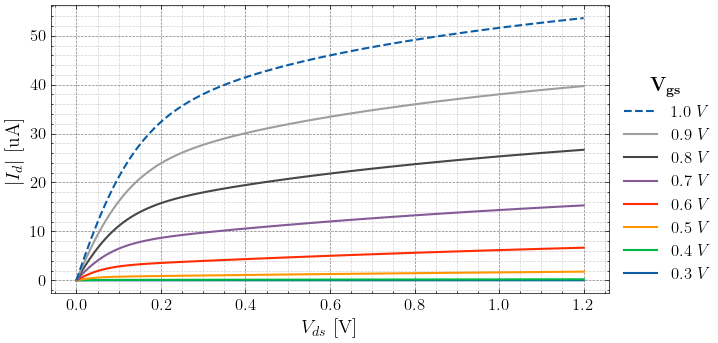

In [6]:
plot_vds_vgs_sweep(np.abs(i_vd * 1e6), "$\\left|I_{d}\\right|$ [uA]", filename="id")

0.44241767988721215


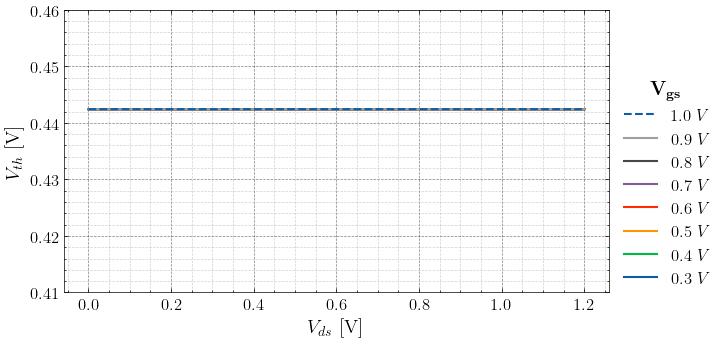

In [12]:
print(np.mean(v_th))

plot_vds_vgs_sweep(v_th, "$V_{th}$ [V]", ylim=(0.41, 0.46), filename="vth")

0.14133656483051105


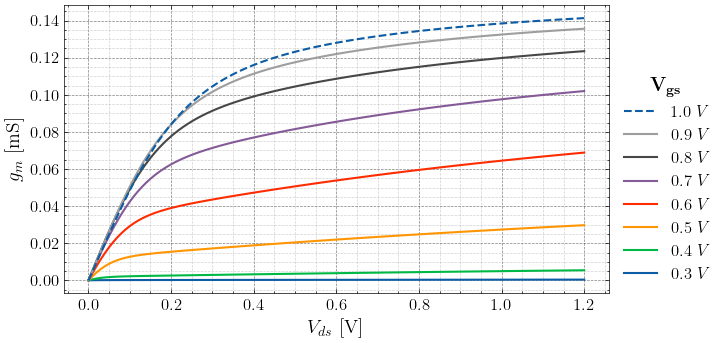

In [13]:
print(np.max(gm) * 1e3)

plot_vds_vgs_sweep(gm * 1e3, "$g_m$ [mS]", filename="gm")

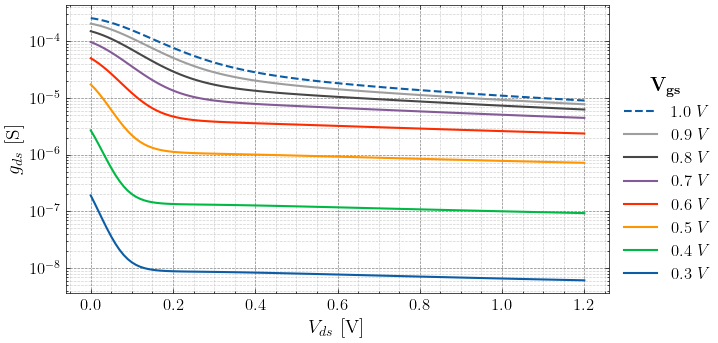

In [9]:
plot_vds_vgs_sweep(gds, "$g_{ds}$ [S]", ylog=True, filename="gds")

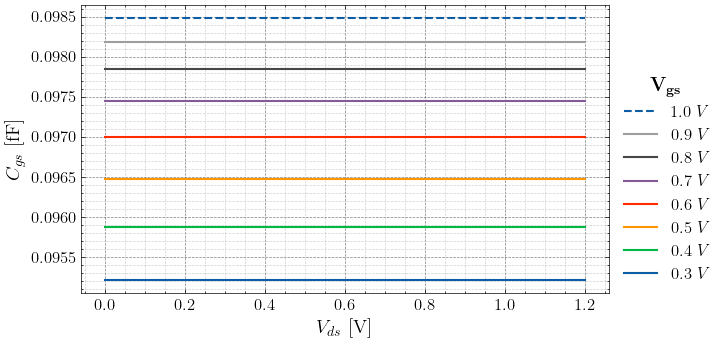

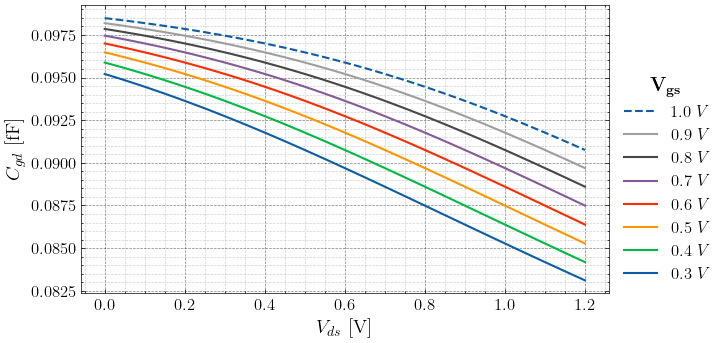

In [10]:
plot_vds_vgs_sweep(cgs * 1e15, "$C_{gs}$ [fF]", filename="cgs")
plot_vds_vgs_sweep(cgd * 1e15, "$C_{gd}$ [fF]", filename="cgd")

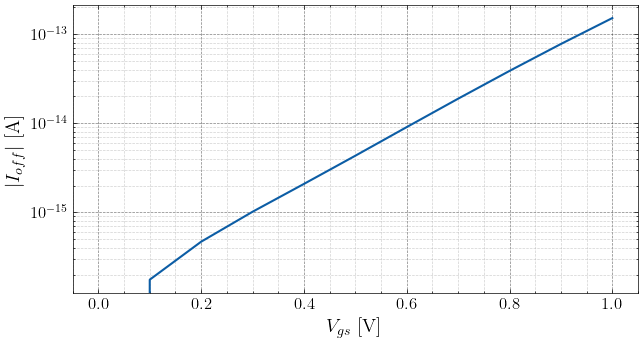

In [ ]:
# plt.figure(figsize=(FIG_WIDTH*0.9, FIG_WIDTH * 0.5))

# plt.plot(vgs_sweep_full._values, np.abs(i_offs), linewidth=1.5)

# plt.xlabel("$V_{gs}$ [V]")
# plt.ylabel("$\\left|I_{off}\\right|$ [A]")
# plt.yscale("log")
# # plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8), borderaxespad=0.5, frameon=False, reverse=True, title="$\\mathbf{V_{gs}}$")
# plt.grid(True, 'minor', 'both', color='0.65', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()

# figure_save(plt.gcf(), filename="ioffs" + suffix)

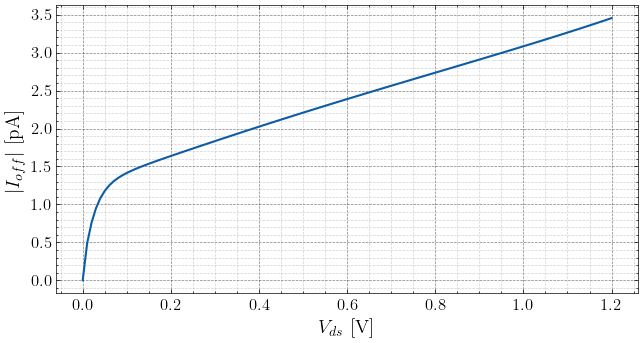

In [20]:
plt.figure(figsize=(FIG_WIDTH*0.9, FIG_WIDTH * 0.5))

plt.plot(v_ds, np.abs(i_offs_1) * 1e12, linewidth=1.5)

plt.xlabel("$V_{ds}$ [V]")
plt.ylabel("$\\left|I_{off}\\right|$ [pA]")
# plt.yscale("log")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8), borderaxespad=0.5, frameon=False, reverse=True, title="$\\mathbf{V_{gs}}$")
plt.grid(True, 'minor', 'both', color='0.65', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), filename="ioffs" + suffix)